In [1]:
# Steps:
# 1. Take data from csvs into one variable
# 2. Setup data into test and training set
# 3. Create Model based on data
# 4. Add additional CSV's and associate correctly
from pycaret.classification import *
import pandas as pd
from supportFunc import *

# ****************************
# **Brandon Fuck-around zone**
# ****************************

# Load and match diffs to tests
result = versionMatch()

# Load tests and condense them into TestStruct class
tests = readTests(result)

# Load diffs/features
diffs = loadDiffs(result)

# Currently possible tags:
# From diffs:
# "total_change", "total_add", "total_del", "total_fchange",
# From tests:
# "child_link","parent_test_chain","child_result","parent_link","parent_start_date","sw_version","result","run_time","error_message","instrument_name","instrument_git_hash","run_date","collection_date","dut_console_log","is_system_test","connection_type","visa_name","test_git_hash","ptf_git_hash","test_log_file","test_name","test_requirements","test_description","scenario_number","expected_skipped_models","linked_issues_snapshot","seed"
# Misc:
# "historic"

# Special:
# "fchange"

numerical_tags = ["total_change", "total_add", "total_del", "total_fchange"]

categorical_tags = []

# For tags that produce more columns or have special logic
special_tags = ["fchange"]

final_set = tableCreate(numerical_tags + categorical_tags + special_tags, tests, diffs)

# Adjust which columns to include here
if "fchange" in special_tags:
    file_names = fileChange(diffs)
    for file in file_names:
        numerical_tags.append(f"{file}_change")
        numerical_tags.append(f"{file}_del")
        numerical_tags.append(f"{file}_add")
        categorical_tags.append(f"{file}_name")
        categorical_tags.append(f"{file}_extension")

print("*************************************")
print("***Processing done, starting model***")
print("*************************************")

C:\Users\Alex Vogt\Desktop\Senior Project Alpha\Capstone\myenv\lib\site-packages\pycaret\loggers\mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


Path :1.41.26.957_MSO56B_results.csv
 This path does not appear to be a file with correctly formatted version number in it's path.
Path :1_41_6_928_results.csv
 This path does not appear to be a file with correctly formatted version number in it's path.
Lines processed: 19272
Lines processed: 38544
Lines processed: 115632
Lines processed: 134904
Lines processed: 154176
Lines processed: 192720
Lines processed: 231266
Lines processed: 403103
Lines processed: 441363
Lines processed: 498753
Lines processed: 613533
Lines processed: 785703
Lines processed: 919613
Lines processed: 1071565
Lines processed: 1166540
Lines processed: 1242532
Lines processed: 1394516
Lines processed: 1432522
Lines processed: 1470528
Lines processed: 1619338
Lines processed: 1657344
Lines processed: 1676615
Lines processed: 1695886
Lines processed: 1867570
Lines processed: 2020418
Lines processed: 2211478
Lines processed: 2345220
Lines processed: 2536280
*************************************
***Processing done, sta

In [6]:
dataset = pd.DataFrame(final_set)
dataset.info()

data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print("Data for Modeling: " + str(data.shape))
print("Unseen Data For Predictions: " + str(data_unseen.shape))
# print(categorical_tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23086 entries, 0 to 23085
Columns: 262 entries, test_name to total_fchange
dtypes: int64(51), object(211)
memory usage: 46.1+ MB
Data for Modeling: (18469, 262)
Unseen Data For Predictions: (4617, 262)


In [7]:
s = setup(
    data,
    target="result",
    numeric_features=numerical_tags,
    categorical_features=categorical_tags,
    silent=True,
    remove_perfect_collinearity = False
)

,Description,Value
0,session_id,7830
1,Target,result
2,Target Type,Binary
3,Label Encoded,"failed: 0, passed: 1"
4,Original Data,"(18469, 262)"
5,Missing Values,False
6,Numeric Features,158
7,Categorical Features,103
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()
print(best)

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:56:53
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Linear Kernel


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9469,0.7214,0.9828,0.9611,0.9718,0.5158,0.5265,4.0520
lr,Logistic Regression,0.9314,0.4416,1.0000,0.9314,0.9645,0.0000,0.0000,1.7560
nb,Naive Bayes,0.9314,0.6104,1.0000,0.9314,0.9645,0.0000,0.0000,0.3820
knn,K Neighbors Classifier,0.9312,0.5576,0.9998,0.9314,0.9644,-0.0005,-0.0013,3.6650


In [8]:
dt = create_model("dt")

In [29]:
# tuned_lr = tune_model(lr, n_iter = 50, optimize = 'AUC')

In [10]:
predictions = predict_model(boosted_dt)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9576,0.9061,0.9858,0.9691,0.9774,0.6297,0.6360


,version,.bumpversion.cfg_change,.bumpversion.cfg_del,.bumpversion.cfg_add,components/calhw_change,components/calhw_del,components/calhw_add,config.xml_change,config.xml_del,config.xml_add,...,runtestsparallel.py_name_1,runtestsparallel.py_extension_1,runtestsparallel.py_extension_N/A,riddick/components/components.pro_name_0,riddick/components/components.pro_name_1,riddick/components/components.pro_extension_1,riddick/components/components.pro_extension_N/A,result,Label,Score
0,14117944.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,passed,passed,1.0
1,14151988.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,passed,passed,1.0
2,14138972.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,passed,passed,1.0
3,14140976.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,passed,passed,1.0
4,14140976.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,failed,passed,0.6


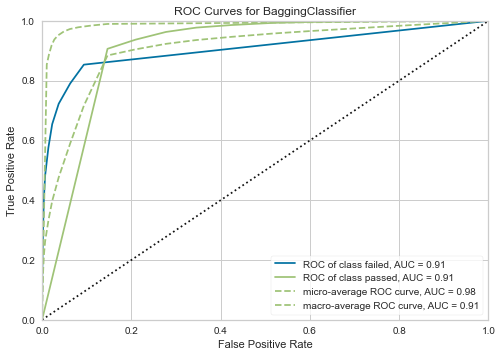

In [11]:
plot_model(boosted_dt)

In [12]:
evaluate_model(boosted_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
unseen_predictions = predict_model(boosted_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0,0.8938,0,0,0,0,0


,test_name,result,version,.bumpversion.cfg_name,.bumpversion.cfg_extension,.bumpversion.cfg_change,.bumpversion.cfg_del,.bumpversion.cfg_add,components/calhw_name,components/calhw_extension,...,riddick/components/components.pro_extension,riddick/components/components.pro_change,riddick/components/components.pro_del,riddick/components/components.pro_add,total_change,total_add,total_del,total_fchange,Label,Score
0,TC-6685,passed,1_41_11_938,1,1,1,2,1,1,1,...,N/A,0,0,0,9,9,9,9,passed,1.0
1,TC-9992,passed,1_41_11_938,1,1,1,2,1,1,1,...,N/A,0,0,0,9,9,9,9,passed,0.9
2,TC-2608,passed,1_41_11_938,1,1,1,2,1,1,1,...,N/A,0,0,0,9,9,9,9,passed,1.0
3,TC-2870,passed,1_41_11_938,1,1,1,2,1,1,1,...,N/A,0,0,0,9,9,9,9,passed,1.0
4,TC-8442,passed,1_41_11_938,1,1,1,2,1,1,1,...,N/A,0,0,0,9,9,9,9,passed,1.0


In [15]:
predictions.to_csv("newpredictions.csv")

In [17]:
final_lr = finalize_model(boosted_dt)
print(final_dt)

NameError: name 'final_dt' is not defined

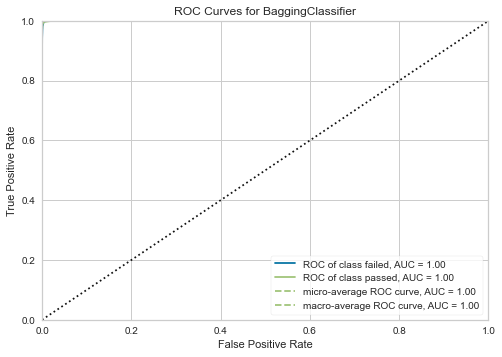

In [18]:
plot_model(final_lr)